In [1614]:
#Install packages:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

import requests
import math
import csv

In [1615]:
#read characteristics and metadata from csv to df:
df = pd.read_csv('../analysis/General_characteristics_and_metadata.csv')

In [1616]:
df

,Unnamed: 0,Data set name,Access type,Access details,Link to dataset,Country of origin,Year of dataset publication,Version,"Last updated, year",Acquires from other dataset:,...,Number of images,Number of unique patients,Number of studies included,Image format,View position,Labels (Image feature labels),Diseases included,Patient age,Patient gender,Comments
0,0,Belarus,No access,Link not available anymore,https://tbportals.niaid.nih.gov,Belarus,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BIMCV-COVID19+,Open access,"Create google account, submission of personal ...",https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,Spain,2020,3,2023,Padchest,...,5530,1311,2429,PNG,"frontal,lateral",NR,"Covid-19, increased density, pneumonia, unchan...",63.11 (± 16.75),602 (45.92%) female,NaN
2,2,BRAX,Regulated access,"Submit personal details, complete required tra...",https://physionet.org/content/brax/1.1.0/,Brazil,2022,1.1.0,2022,NR,...,40967,19351,24959,DICOM,"Frontal,lateral",14,"Enlarged Cardiomediastinum, Cardiomegaly, Lung...",Reported,Reported,"State age and gender is reported, but I cannot..."
3,3,CANDID-PTX,Regulated access,Complete online ethics course and sign data us...,https://figshare.com/articles/dataset/CANDID-P...,New Zealand,2021,NR,2021,NR,...,19237,NR,NR,DICOM,Frontal,4,"Pneumothorax, no pneumothorax, unsure positive...","60.1 (± 20.1), over 16 years","10278 male (52.4%), 8929 female (46.4%), 30 NA...",NaN
4,4,Chest x-ray disease images,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/parsagouran/ch...,NR,2023,NR,2023,NR,...,572,NR,NR,"jpg, jpeg",NR,NR,NR,NR,NR,NaN
5,5,Chest X-Rays - Covid19 Pakistan,Open access,Downloadable zip-file,https://data.mendeley.com/datasets/fvp7m8c9ss,Pakistan,2020,1,2020,NR,...,527,75,NR,JPEG,Frontal,2,"Covid-19, non-covid-19",NR,NR,NaN
6,6,Chest X-Rays Dataset,Open access,Create Kaggle account to download zip-file,https://datasetsearch.research.google.com/sear...,NR,2018,NR,2018,NR,...,910,NR,NR,"jpg, jpeg, png, gif",NR,5,"Atelectasis, Infiltration, Effusion, Cardiomeg...",NR,NR,NaN
7,7,CHEST-XRAY-PNEUMONIA,Regulated access,Create IEEE port account and pay,https://ieee-dataport.org/documents/chest-xray...,NR,2021,NR,2021,NR,...,NR,NR,NR,NR,NR,NR,Pneumonia,NR,NR,NaN
8,8,ChestX-ray14,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2020,NR,2020,ChestX-ray8,...,112120,30805,NR,png,"AP, PA",14,"Atelectasis, Infiltration, Pneumothorax, Effus...","46.63 (± 16.6), 0-95yo","48780 female (43.5%), 63340 male (56.5%)",NaN
9,9,ChestX-ray8,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2017,NR,2017,NR,...,108948,32717,NR,png,"AP, PA",8,"Atelectasis, Infiltration, Pneumothorax, Effus...",NR,NR,NaN


In [1617]:
#drop unnamed column:
df = df.drop(['Unnamed: 0'], axis=1)

In [1618]:
#rename columns:
df = df.rename(columns={"Data set name": "Name", "Link to dataset":"Link", "Year of dataset publication":"Year of publication", "Labels (Image feature labels)":"Labels"})

In [1619]:
#check the access types:
df['Access type'].unique()

array(['No access', 'Open access', 'Regulated access'], dtype=object)

In [1620]:
#remove no access from df:
df = df[df['Access type'] != "No access"]

In [1397]:
df

,Name,Access type,Access details,Link,Country of origin,Year of publication,Version,"Last updated, year",Acquires from other dataset:,Data collection period (Y/N),...,Number of images,Number of unique patients,Number of studies included,Image format,View position,Labels,Diseases included,Patient age,Patient gender,Comments
1,BIMCV-COVID19+,Open access,"Create google account, submission of personal ...",https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,Spain,2020,3,2023,Padchest,Y,...,5530,1311,2429,PNG,"frontal,lateral",NR,"Covid-19, increased density, pneumonia, unchan...",63.11 (± 16.75),602 (45.92%) female,NaN
2,BRAX,Regulated access,"Submit personal details, complete required tra...",https://physionet.org/content/brax/1.1.0/,Brazil,2022,1.1.0,2022,NR,N,...,40967,19351,24959,DICOM,"Frontal,lateral",14,"Enlarged Cardiomediastinum, Cardiomegaly, Lung...",Reported,Reported,"State age and gender is reported, but I cannot..."
3,CANDID-PTX,Regulated access,Complete online ethics course and sign data us...,https://figshare.com/articles/dataset/CANDID-P...,New Zealand,2021,NR,2021,NR,Y,...,19237,NR,NR,DICOM,Frontal,4,"Pneumothorax, no pneumothorax, unsure positive...","60.1 (± 20.1), over 16 years","10278 male (52.4%), 8929 female (46.4%), 30 NA...",NaN
4,Chest x-ray disease images,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/parsagouran/ch...,NR,2023,NR,2023,NR,N,...,572,NR,NR,"jpg, jpeg",NR,NR,NR,NR,NR,NaN
5,Chest X-Rays - Covid19 Pakistan,Open access,Downloadable zip-file,https://data.mendeley.com/datasets/fvp7m8c9ss,Pakistan,2020,1,2020,NR,Y,...,527,75,NR,JPEG,Frontal,2,"Covid-19, non-covid-19",NR,NR,NaN
6,Chest X-Rays Dataset,Open access,Create Kaggle account to download zip-file,https://datasetsearch.research.google.com/sear...,NR,2018,NR,2018,NR,Y,...,910,NR,NR,"jpg, jpeg, png, gif",NR,5,"Atelectasis, Infiltration, Effusion, Cardiomeg...",NR,NR,NaN
7,CHEST-XRAY-PNEUMONIA,Regulated access,Create IEEE port account and pay,https://ieee-dataport.org/documents/chest-xray...,NR,2021,NR,2021,NR,N,...,NR,NR,NR,NR,NR,NR,Pneumonia,NR,NR,NaN
8,ChestX-ray14,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2020,NR,2020,ChestX-ray8,Y,...,112120,30805,NR,png,"AP, PA",14,"Atelectasis, Infiltration, Pneumothorax, Effus...","46.63 (± 16.6), 0-95yo","48780 female (43.5%), 63340 male (56.5%)",NaN
9,ChestX-ray8,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2017,NR,2017,NR,Y,...,108948,32717,NR,png,"AP, PA",8,"Atelectasis, Infiltration, Pneumothorax, Effus...",NR,NR,NaN
10,CheXpert,Open access,Create Standford AIMI account and download zip...,https://stanfordmlgroup.github.io/competitions...,USA,2019,1.0,2019,NR,Y,...,224316,65240,NR,jpg,"Frontal,lateral",14,No Finding Enlarged Cardiom. Cardiomegaly Lung...,NR,NR,NaN


In [1621]:
#Count open access/regulated access:
df.groupby(df['Access type'])[['Name']].count()

,Name
Access type,
Open access,36
Regulated access,7


In [1622]:
#save all open access/regulated access datasets in seperate dataframes:
oa_df = df[df['Access type'] == "Open access"]
regulated_df=df[df['Access type'] == "Regulated access"]

In [1623]:
oa_df

,Name,Access type,Access details,Link,Country of origin,Year of publication,Version,"Last updated, year",Acquires from other dataset:,Data collection period (Y/N),...,Number of images,Number of unique patients,Number of studies included,Image format,View position,Labels,Diseases included,Patient age,Patient gender,Comments
1,BIMCV-COVID19+,Open access,"Create google account, submission of personal ...",https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,Spain,2020,3,2023,Padchest,Y,...,5530,1311,2429,PNG,"frontal,lateral",NR,"Covid-19, increased density, pneumonia, unchan...",63.11 (± 16.75),602 (45.92%) female,NaN
4,Chest x-ray disease images,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/parsagouran/ch...,NR,2023,NR,2023,NR,N,...,572,NR,NR,"jpg, jpeg",NR,NR,NR,NR,NR,NaN
5,Chest X-Rays - Covid19 Pakistan,Open access,Downloadable zip-file,https://data.mendeley.com/datasets/fvp7m8c9ss,Pakistan,2020,1,2020,NR,Y,...,527,75,NR,JPEG,Frontal,2,"Covid-19, non-covid-19",NR,NR,NaN
6,Chest X-Rays Dataset,Open access,Create Kaggle account to download zip-file,https://datasetsearch.research.google.com/sear...,NR,2018,NR,2018,NR,Y,...,910,NR,NR,"jpg, jpeg, png, gif",NR,5,"Atelectasis, Infiltration, Effusion, Cardiomeg...",NR,NR,NaN
8,ChestX-ray14,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2020,NR,2020,ChestX-ray8,Y,...,112120,30805,NR,png,"AP, PA",14,"Atelectasis, Infiltration, Pneumothorax, Effus...","46.63 (± 16.6), 0-95yo","48780 female (43.5%), 63340 male (56.5%)",NaN
9,ChestX-ray8,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2017,NR,2017,NR,Y,...,108948,32717,NR,png,"AP, PA",8,"Atelectasis, Infiltration, Pneumothorax, Effus...",NR,NR,NaN
10,CheXpert,Open access,Create Standford AIMI account and download zip...,https://stanfordmlgroup.github.io/competitions...,USA,2019,1.0,2019,NR,Y,...,224316,65240,NR,jpg,"Frontal,lateral",14,No Finding Enlarged Cardiom. Cardiomegaly Lung...,NR,NR,NaN
11,COVID 19 Xray Image Dataset with Huge Samples,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/mr3suvhro/covi...,NR,2020,NR,2020,NR,N,...,2328,NR,NR,"png, jpeg, jpg",NR,NR,"Covid-19, non-covid-19",NR,NR,NaN
12,COVID-19 AND NORMAL CHEST X-RAY,Open access,Create IEEE port account and download zip-file,https://ieee-dataport.org/open-access/covid-19...,China,2021,NR,2021,NR,N,...,326,NR,NR,jpg,NR,NR,Covid-19,NR,NR,NaN
13,covid-19 chest x-ray detection dataset,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/rahulmakwana/c...,NR,2020,1,2020,NR,N,...,200,NR,NR,"png, jpeg, jpg",NR,NR,Covid-19,NR,NR,NaN


In [1624]:
#save regulated datasets as csv:
oa_df.to_csv("openaccess_datasets.csv")

In [1625]:
regulated_df

,Name,Access type,Access details,Link,Country of origin,Year of publication,Version,"Last updated, year",Acquires from other dataset:,Data collection period (Y/N),...,Number of images,Number of unique patients,Number of studies included,Image format,View position,Labels,Diseases included,Patient age,Patient gender,Comments
2,BRAX,Regulated access,"Submit personal details, complete required tra...",https://physionet.org/content/brax/1.1.0/,Brazil,2022,1.1.0,2022,NR,N,...,40967,19351,24959,DICOM,"Frontal,lateral",14,"Enlarged Cardiomediastinum, Cardiomegaly, Lung...",Reported,Reported,"State age and gender is reported, but I cannot..."
3,CANDID-PTX,Regulated access,Complete online ethics course and sign data us...,https://figshare.com/articles/dataset/CANDID-P...,New Zealand,2021,NR,2021,NR,Y,...,19237,NR,NR,DICOM,Frontal,4,"Pneumothorax, no pneumothorax, unsure positive...","60.1 (± 20.1), over 16 years","10278 male (52.4%), 8929 female (46.4%), 30 NA...",NaN
7,CHEST-XRAY-PNEUMONIA,Regulated access,Create IEEE port account and pay,https://ieee-dataport.org/documents/chest-xray...,NR,2021,NR,2021,NR,N,...,NR,NR,NR,NR,NR,NR,Pneumonia,NR,NR,NaN
32,MIMIC-CXR,Regulated access,"Submit personal details, complete required tra...",https://physionet.org/content/mimic-cxr/,Israel,2019,2.0.0,2019,NR,Y,...,227835,65383,NR,DICOM,NR,NR,NR,NR,NR,NaN
33,NIAID TB dataset,Regulated access,"Submit personal information, description for u...",https://tbportals.niaid.nih.gov/download-data,"Azerbaijan, Belarus, China, Georgia, India, Ka...",2017,NR,2017,NR,N,...,9187,7664,NR,NR,NR,NR,Tuberculocis,"0-14: 0.2%, 15-44: 45.79% ,45-64: 28%, 65 and ...","27% female, 73% male",NaN
36,PLCO,Regulated access,Create NIH account request access (takes min. ...,https://cdas.cancer.gov/datasets/plco/21/,USA,2013,NR,2015,NR,Y,...,89000,25000,NR,TIFF,NR,NR,Lung cancer,NR,NR,NaN
43,VinDR-CXR,Regulated access,"Submit personal details, complete required tra...",https://physionet.org/content/vindr-cxr/1.0.0/,Vietnam,2020,NR,2020,NR,Y,...,18000,NR,NR,DICOM,PA/AP,28,"Aortic enlargement, Atelectasis, Cardiomegaly,...","training set median: 43.77, test set median 31.80","training set: male 52.21%, female 47.79%, test...",NaN


In [1626]:
#save regulated datasets as csv:
regulated_df.to_csv("regulated_datasets.csv")

# Descriptive analysis of datasets:

## Country of origin:

In [1627]:
#group by country of origin

df.groupby(df['Country of origin'])[['Name']].count()

,Name
Country of origin,
"26 countries (spread over Afrika, Americas, Europe, Asia, Oceania, uknown)",1
"Azerbaijan, Belarus, China, Georgia, India, Kazakhstan, Kyrgyzstan, Moldova, Nigeria, Romania, Senegal, South Africa, Ukraine",1
Brazil,1
"Brazil, Turkey, USA, Canada",1
China,4
Germany,1
India,2
Iran,1
Israel,1


In [1628]:
#Misspelling of Spain, Span, is recoded:
df['Country of origin'] = df['Country of origin'].replace({'Span':'Spain'})

In [1629]:
#copy dataframe:
country_df = df.copy()

In [1630]:
#rename the datasets with multiple countries to multiple for 
country_df['Country of origin'] = country_df['Country of origin'].replace({'26 countries (spread over Afrika, Americas, Europe, Asia, Oceania, uknown)':'Multiple', 'Azerbaijan, Belarus, China, Georgia, India, Kazakhstan, Kyrgyzstan, Moldova, Nigeria, Romania, Senegal, South Africa, Ukraine':'Multiple','Brazil, Turkey, USA, Canada':'Multiple', "Japan, USA":"Multiple", "NR":"Not reported"})


In [1631]:
country_df = country_df.groupby(country_df['Country of origin'])[['Name']].count().reset_index()

In [1632]:
country_df = country_df.sort_values(by='Name', ascending=True)

In [1633]:
country_df

,Country of origin,Name
0,Brazil,1
2,Germany,1
4,Iran,1
5,Israel,1
6,Jordan,1
8,New Zealand,1
10,Pakistan,1
13,Vietnam,1
3,India,2
11,Spain,3


In [1634]:
#number of datasets:
n = country_df["Name"].sum()

In [1635]:
n

43

In [1636]:
#calculate percent:
country_df["Percent"]=country_df["Name"]/n*100

In [1637]:
country_df

,Country of origin,Name,Percent
0,Brazil,1,2.325581
2,Germany,1,2.325581
4,Iran,1,2.325581
5,Israel,1,2.325581
6,Jordan,1,2.325581
8,New Zealand,1,2.325581
10,Pakistan,1,2.325581
13,Vietnam,1,2.325581
3,India,2,4.651163
11,Spain,3,6.976744


Text(0.5, 0, 'Number of datasets')

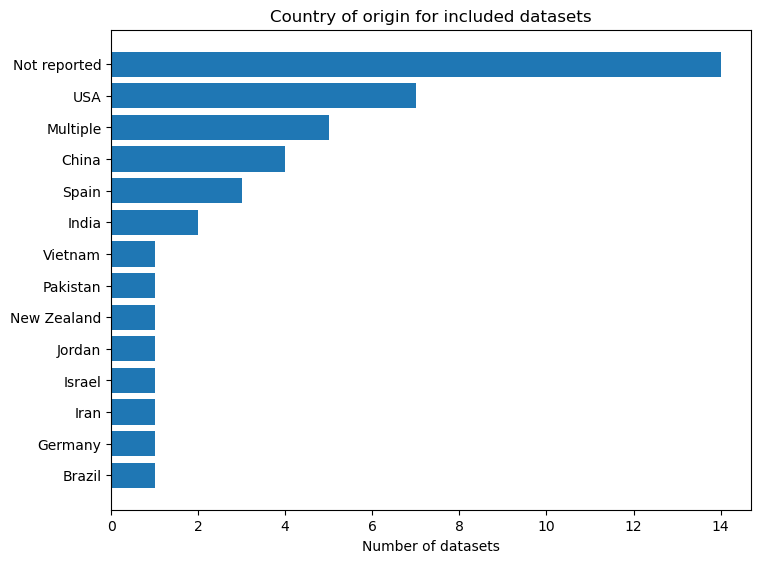

In [1415]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
countries = country_df["Country of origin"]
number = country_df["Name"]
ax.barh(countries,number)
ax.set_title("Country of origin for included datasets")
ax.set_xlabel("Number of datasets")

## Year of publication

In [1416]:
#Look at the year of publication for the datasets:
df['Year of publication'].describe()

count       43
unique      11
top       2020
freq        16
Name: Year of publication, dtype: object

In [1417]:
#earlist released dataset:
df['Year of publication'].min()

'2000'

In [1418]:
#latest released dataset:
df['Year of publication'].max()

'2023'

In [1419]:
#group by year of publication:

year_df = df.groupby(df['Year of publication'])[['Name']].count()

In [1420]:
year_df

,Name
Year of publication,
2000,1
2013,1
2014,4
2015,1
2017,3
2018,1
2019,3
2020,16
2021,8


In [1421]:
#calculate percent:
year_df["Percent"]=year_df["Name"]/n*100

In [1422]:
year_df

,Name,Percent
Year of publication,,
2000,1,2.325581
2013,1,2.325581
2014,4,9.302326
2015,1,2.325581
2017,3,6.976744
2018,1,2.325581
2019,3,6.976744
2020,16,37.209302
2021,8,18.604651


## diseases/abnormalities included:

In [1423]:
df['Diseases included']

1     Covid-19, increased density, pneumonia, unchan...
2     Enlarged Cardiomediastinum, Cardiomegaly, Lung...
3     Pneumothorax, no pneumothorax, unsure positive...
4                                                    NR
5                                Covid-19, non-covid-19
6     Atelectasis, Infiltration, Effusion, Cardiomeg...
7                                             Pneumonia
8     Atelectasis, Infiltration, Pneumothorax, Effus...
9     Atelectasis, Infiltration, Pneumothorax, Effus...
10    No Finding Enlarged Cardiom. Cardiomegaly Lung...
11                               Covid-19, non-covid-19
12                                             Covid-19
13                                             Covid-19
14                                             Covid-19
15                                             Covid-19
16                                             Covid-19
17    COVID-19 (SARSr-CoV-2), SARS (SARSr-CoV-1), ME...
18                                             C

In [1424]:
#convert all string to lowercase:
df['Diseases included']=df['Diseases included'].apply(str.lower)

In [1425]:
#Convert the included diseases/abnormalities to list:
#df['Diseases included'] = df['Diseases included'].str.split(',').tolist()

In [1426]:
df['Diseases included']

1     covid-19, increased density, pneumonia, unchan...
2     enlarged cardiomediastinum, cardiomegaly, lung...
3     pneumothorax, no pneumothorax, unsure positive...
4                                                    nr
5                                covid-19, non-covid-19
6     atelectasis, infiltration, effusion, cardiomeg...
7                                             pneumonia
8     atelectasis, infiltration, pneumothorax, effus...
9     atelectasis, infiltration, pneumothorax, effus...
10    no finding enlarged cardiom. cardiomegaly lung...
11                               covid-19, non-covid-19
12                                             covid-19
13                                             covid-19
14                                             covid-19
15                                             covid-19
16                                             covid-19
17    covid-19 (sarsr-cov-2), sars (sarsr-cov-1), me...
18                                             c

In [1427]:
#count number of publications that contains covid-19:
covid19 = 0
for i in df['Diseases included']:
    if "covid-19" in i:
        covid19+=1

print(covid19)

21


In [1428]:
df

,Name,Access type,Access details,Link,Country of origin,Year of publication,Version,"Last updated, year",Acquires from other dataset:,Data collection period (Y/N),...,Number of images,Number of unique patients,Number of studies included,Image format,View position,Labels,Diseases included,Patient age,Patient gender,Comments
1,BIMCV-COVID19+,Open access,"Create google account, submission of personal ...",https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,Spain,2020,3,2023,Padchest,Y,...,5530,1311,2429,PNG,"frontal,lateral",NR,"covid-19, increased density, pneumonia, unchan...",63.11 (± 16.75),602 (45.92%) female,NaN
2,BRAX,Regulated access,"Submit personal details, complete required tra...",https://physionet.org/content/brax/1.1.0/,Brazil,2022,1.1.0,2022,NR,N,...,40967,19351,24959,DICOM,"Frontal,lateral",14,"enlarged cardiomediastinum, cardiomegaly, lung...",Reported,Reported,"State age and gender is reported, but I cannot..."
3,CANDID-PTX,Regulated access,Complete online ethics course and sign data us...,https://figshare.com/articles/dataset/CANDID-P...,New Zealand,2021,NR,2021,NR,Y,...,19237,NR,NR,DICOM,Frontal,4,"pneumothorax, no pneumothorax, unsure positive...","60.1 (± 20.1), over 16 years","10278 male (52.4%), 8929 female (46.4%), 30 NA...",NaN
4,Chest x-ray disease images,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/parsagouran/ch...,NR,2023,NR,2023,NR,N,...,572,NR,NR,"jpg, jpeg",NR,NR,nr,NR,NR,NaN
5,Chest X-Rays - Covid19 Pakistan,Open access,Downloadable zip-file,https://data.mendeley.com/datasets/fvp7m8c9ss,Pakistan,2020,1,2020,NR,Y,...,527,75,NR,JPEG,Frontal,2,"covid-19, non-covid-19",NR,NR,NaN
6,Chest X-Rays Dataset,Open access,Create Kaggle account to download zip-file,https://datasetsearch.research.google.com/sear...,NR,2018,NR,2018,NR,Y,...,910,NR,NR,"jpg, jpeg, png, gif",NR,5,"atelectasis, infiltration, effusion, cardiomeg...",NR,NR,NaN
7,CHEST-XRAY-PNEUMONIA,Regulated access,Create IEEE port account and pay,https://ieee-dataport.org/documents/chest-xray...,NR,2021,NR,2021,NR,N,...,NR,NR,NR,NR,NR,NR,pneumonia,NR,NR,NaN
8,ChestX-ray14,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2020,NR,2020,ChestX-ray8,Y,...,112120,30805,NR,png,"AP, PA",14,"atelectasis, infiltration, pneumothorax, effus...","46.63 (± 16.6), 0-95yo","48780 female (43.5%), 63340 male (56.5%)",NaN
9,ChestX-ray8,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2017,NR,2017,NR,Y,...,108948,32717,NR,png,"AP, PA",8,"atelectasis, infiltration, pneumothorax, effus...",NR,NR,NaN
10,CheXpert,Open access,Create Standford AIMI account and download zip...,https://stanfordmlgroup.github.io/competitions...,USA,2019,1.0,2019,NR,Y,...,224316,65240,NR,jpg,"Frontal,lateral",14,no finding enlarged cardiom. cardiomegaly lung...,NR,NR,NaN


In [1429]:
#add rows with diseases column:
s= 'covid-19'
df['covid19'] = df['Diseases included'].apply(lambda x: any(s in x for i in df))

In [1430]:
df

,Name,Access type,Access details,Link,Country of origin,Year of publication,Version,"Last updated, year",Acquires from other dataset:,Data collection period (Y/N),...,Number of unique patients,Number of studies included,Image format,View position,Labels,Diseases included,Patient age,Patient gender,Comments,covid19
1,BIMCV-COVID19+,Open access,"Create google account, submission of personal ...",https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,Spain,2020,3,2023,Padchest,Y,...,1311,2429,PNG,"frontal,lateral",NR,"covid-19, increased density, pneumonia, unchan...",63.11 (± 16.75),602 (45.92%) female,NaN,True
2,BRAX,Regulated access,"Submit personal details, complete required tra...",https://physionet.org/content/brax/1.1.0/,Brazil,2022,1.1.0,2022,NR,N,...,19351,24959,DICOM,"Frontal,lateral",14,"enlarged cardiomediastinum, cardiomegaly, lung...",Reported,Reported,"State age and gender is reported, but I cannot...",False
3,CANDID-PTX,Regulated access,Complete online ethics course and sign data us...,https://figshare.com/articles/dataset/CANDID-P...,New Zealand,2021,NR,2021,NR,Y,...,NR,NR,DICOM,Frontal,4,"pneumothorax, no pneumothorax, unsure positive...","60.1 (± 20.1), over 16 years","10278 male (52.4%), 8929 female (46.4%), 30 NA...",NaN,False
4,Chest x-ray disease images,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/parsagouran/ch...,NR,2023,NR,2023,NR,N,...,NR,NR,"jpg, jpeg",NR,NR,nr,NR,NR,NaN,False
5,Chest X-Rays - Covid19 Pakistan,Open access,Downloadable zip-file,https://data.mendeley.com/datasets/fvp7m8c9ss,Pakistan,2020,1,2020,NR,Y,...,75,NR,JPEG,Frontal,2,"covid-19, non-covid-19",NR,NR,NaN,True
6,Chest X-Rays Dataset,Open access,Create Kaggle account to download zip-file,https://datasetsearch.research.google.com/sear...,NR,2018,NR,2018,NR,Y,...,NR,NR,"jpg, jpeg, png, gif",NR,5,"atelectasis, infiltration, effusion, cardiomeg...",NR,NR,NaN,False
7,CHEST-XRAY-PNEUMONIA,Regulated access,Create IEEE port account and pay,https://ieee-dataport.org/documents/chest-xray...,NR,2021,NR,2021,NR,N,...,NR,NR,NR,NR,NR,pneumonia,NR,NR,NaN,False
8,ChestX-ray14,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2020,NR,2020,ChestX-ray8,Y,...,30805,NR,png,"AP, PA",14,"atelectasis, infiltration, pneumothorax, effus...","46.63 (± 16.6), 0-95yo","48780 female (43.5%), 63340 male (56.5%)",NaN,False
9,ChestX-ray8,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,USA,2017,NR,2017,NR,Y,...,32717,NR,png,"AP, PA",8,"atelectasis, infiltration, pneumothorax, effus...",NR,NR,NaN,False
10,CheXpert,Open access,Create Standford AIMI account and download zip...,https://stanfordmlgroup.github.io/competitions...,USA,2019,1.0,2019,NR,Y,...,65240,NR,jpg,"Frontal,lateral",14,no finding enlarged cardiom. cardiomegaly lung...,NR,NR,NaN,False


In [1431]:
covid_byyear = df.groupby(['Year of publication','covid19', ])[['Name']].count().reset_index()

In [1432]:
covid_byyear

,Year of publication,covid19,Name
0,2000,False,1
1,2013,False,1
2,2014,False,4
3,2015,False,1
4,2017,False,3
5,2018,False,1
6,2019,False,3
7,2020,False,3
8,2020,True,13
9,2021,False,2


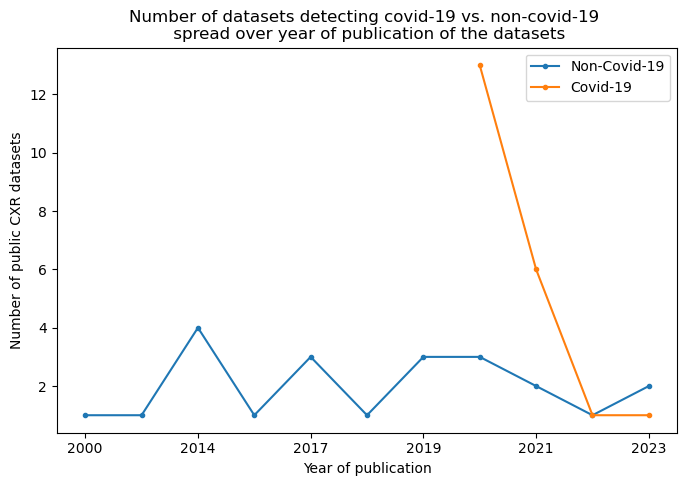

In [1433]:
# plot number of covid-19 dataset vs. non-covid-19 spread on years of publication
fig, ax = plt.subplots(figsize=(8,5))
# use unstack()
df.groupby(['Year of publication','covid19', ])[['Name']].count().unstack().plot(style='.-', ax=ax)
ax.set_title('Number of datasets detecting covid-19 vs. non-covid-19 \n spread over year of publication of the datasets')
ax.set_ylabel('Number of public CXR datasets')
ax.legend(['Non-Covid-19', 'Covid-19'])

## Number of images:

In [1434]:
df["Number of images"]

1       5530
2      40967
3      19237
4        572
5        527
6        910
7         NR
8     112120
9     108948
10    224316
11      2328
12       326
13       200
14       747
15       368
16       341
17       761
18       243
19       200
20       144
21     13638
22      5228
23       852
24     30386
25       537
26        50
27      5856
28      8121
29       247
30      8105
31       138
32    227835
33      9187
35    160861
36     89000
37      1257
38       662
40       156
41       150
42     11200
43     18000
44      5935
45      6743
Name: Number of images, dtype: object

In [1435]:
df["Number of images"].count()

43

In [1436]:
#copy dataframe:
image_df = df.copy()

In [1437]:
#remove not reported (NR) (missing)
df_image= image_df[image_df["Number of images"]!="NR"]

In [1438]:
df_image['Number of images']

1       5530
2      40967
3      19237
4        572
5        527
6        910
8     112120
9     108948
10    224316
11      2328
12       326
13       200
14       747
15       368
16       341
17       761
18       243
19       200
20       144
21     13638
22      5228
23       852
24     30386
25       537
26        50
27      5856
28      8121
29       247
30      8105
31       138
32    227835
33      9187
35    160861
36     89000
37      1257
38       662
40       156
41       150
42     11200
43     18000
44      5935
45      6743
Name: Number of images, dtype: object

In [1439]:
df_image['Number of images'].count()

42

In [1440]:
#convert to number of images to int:
df_image = df_image.astype({'Number of images':'str','Number of images':'int' })

In [1441]:
images_year = df_image.groupby(["Year of publication"])['Number of images'].sum().reset_index()

In [1442]:
images_year

,Year of publication,Number of images
0,2000,247
1,2013,89000
2,2014,1106
3,2015,8121
4,2017,123991
5,2018,910
6,2019,613012
7,2020,183825
8,2021,41102
9,2022,46195


In [1443]:
#Cummulative images:
images_year['Cummulative number of images']=images_year['Number of images'].cumsum()

In [1444]:
images_year

,Year of publication,Number of images,Cummulative number of images
0,2000,247,247
1,2013,89000,89247
2,2014,1106,90353
3,2015,8121,98474
4,2017,123991,222465
5,2018,910,223375
6,2019,613012,836387
7,2020,183825,1020212
8,2021,41102,1061314
9,2022,46195,1107509


## Number of patients:

In [1445]:
df["Number of unique patients"]

1      1311
2     19351
3        NR
4        NR
5        75
6        NR
7        NR
8     30805
9     32717
10    65240
11       NR
12       NR
13       NR
14       NR
15       NR
16       NR
17      412
18       71
19       NR
20       NR
21     1365
22       NR
23       NR
24    17026
25       NR
26       NR
27       NR
28     3996
29       NR
30       NR
31       NR
32    65383
33     7664
35    67625
36    25000
37      361
38       NR
40       NR
41       NR
42       NR
43       NR
44       NR
45       NR
Name: Number of unique patients, dtype: object

In [1446]:
df["Number of unique patients"].count()

43

In [1503]:
#copy df:
patients_df = df.copy()

In [1504]:
#remove not reported (NR) (missing)
patients_df= patients_df[patients_df["Number of unique patients"]!="NR"]


In [1505]:
patients_df["Number of unique patients"]

1      1311
2     19351
5        75
8     30805
9     32717
10    65240
17      412
18       71
21     1365
24    17026
28     3996
32    65383
33     7664
35    67625
36    25000
37      361
Name: Number of unique patients, dtype: object

In [1450]:
patients_df["Number of unique patients"].count()

16

In [1451]:
#convert to number of patients to int:
patients_df = patients_df.astype({'Number of unique patients':'str','Number of unique patients':'int' })

In [1452]:
patients_year = patients_df.groupby(["Year of publication"])['Number of unique patients'].sum().reset_index()

In [1453]:
patients_year

,Year of publication,Number of unique patients
0,2013,25000
1,2015,3996
2,2017,40381
3,2019,198248
4,2020,49700
5,2021,1726
6,2022,19351


In [1454]:
#cummulative patients year:
patients_year['Cummulative number of patients']=patients_year['Number of unique patients'].cumsum()

In [1455]:
patients_year

,Year of publication,Number of unique patients,Cummulative number of patients
0,2013,25000,25000
1,2015,3996,28996
2,2017,40381,69377
3,2019,198248,267625
4,2020,49700,317325
5,2021,1726,319051
6,2022,19351,338402


Text(0.5, 0, 'Year of publication')

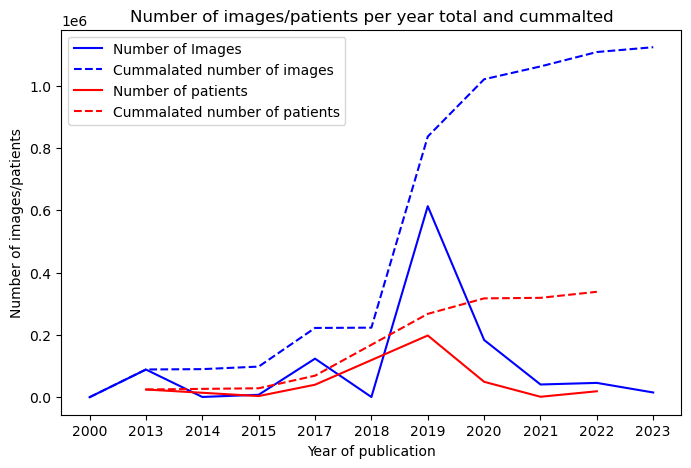

In [1456]:
#plot the number of images for each year of publication and cummulative
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(images_year['Year of publication'], images_year['Number of images'], color='blue')
ax.plot(images_year['Year of publication'], images_year['Cummulative number of images'], color='blue', linestyle='--')
ax.plot(patients_year['Year of publication'], patients_year['Number of unique patients'], color='red')
ax.plot(patients_year['Year of publication'], patients_year['Cummulative number of patients'], color='red', linestyle='--')
ax.legend(['Number of Images', 'Cummalated number of images', 'Number of patients', 'Cummalated number of patients'])
ax.set_title("Number of images/patients per year total and cummalted")
ax.set_ylabel('Number of images/patients')
ax.set_xlabel('Year of publication')

## Diseases/abnormalities

In [1457]:
df['Diseases included']

1     covid-19, increased density, pneumonia, unchan...
2     enlarged cardiomediastinum, cardiomegaly, lung...
3     pneumothorax, no pneumothorax, unsure positive...
4                                                    nr
5                                covid-19, non-covid-19
6     atelectasis, infiltration, effusion, cardiomeg...
7                                             pneumonia
8     atelectasis, infiltration, pneumothorax, effus...
9     atelectasis, infiltration, pneumothorax, effus...
10    no finding enlarged cardiom. cardiomegaly lung...
11                               covid-19, non-covid-19
12                                             covid-19
13                                             covid-19
14                                             covid-19
15                                             covid-19
16                                             covid-19
17    covid-19 (sarsr-cov-2), sars (sarsr-cov-1), me...
18                                             c

In [1458]:
#add rows with tuberculosis diseases column:
#strings to check for:
string= ['tuberculocis','tb', 'ptb']
df['tuberculocis'] = df['Diseases included'].apply(lambda x: any(s in x for s in strings for i in df))

#strings = ['cyber truck', 'cybertruck']
#df['cybertruck'] = df['tweet_text'].apply(lambda x: any(s in x.lower() for s in strings))

In [1459]:
df['tuberculocis']

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31     True
32    False
33     True
35    False
36    False
37    False
38     True
40     True
41     True
42     True
43    False
44    False
45    False
Name: tuberculocis, dtype: bool

In [1460]:
#count number of datasets with covid-19
tub_byyear = df.groupby(['tuberculocis', ])[['Name']].count().reset_index()

In [1461]:
tub_byyear

,tuberculocis,Name
0,False,37
1,True,6


In [1462]:
#add column with pneunomia diseases column:
s= 'pneumonia'
df['pneumonia'] = df['Diseases included'].apply(lambda x: any(s in x for i in df))

In [1463]:
df['pneumonia'] 

1      True
2      True
3     False
4     False
5     False
6     False
7      True
8      True
9      True
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22     True
23    False
24     True
25     True
26    False
27     True
28    False
29    False
30     True
31    False
32    False
33    False
35     True
36    False
37    False
38    False
40    False
41    False
42    False
43     True
44     True
45     True
Name: pneumonia, dtype: bool

In [1464]:
#count number of datasets with pneu:
pneu_byyear = df.groupby(['pneumonia', ])[['Name']].count().reset_index()

In [1465]:
pneu_byyear

,pneumonia,Name
0,False,28
1,True,15


In [1466]:
#add rows with cardiomegaly disease column:
s = 'cardiomegaly'
df['cardiomegaly'] = df['Diseases included'].apply(lambda x: any(s in x for i in df))

In [1467]:
#count number of datasets with cardiomegaly :
cardi_byyear = df.groupby(['cardiomegaly'])[['Name']].count().reset_index()

In [1468]:
cardi_byyear

,cardiomegaly,Name
0,False,34
1,True,9


In [1469]:
#add rows with atelectasis disease column:
s = 'atelectasis'
df['atelectasis'] = df['Diseases included'].apply(lambda x: any(s in x for i in df))

In [1470]:
#count number of datasets with atelectasis :
atelec_byyear = df.groupby(['atelectasis'])[['Name']].count().reset_index()

In [1471]:
atelec_byyear

,atelectasis,Name
0,False,33
1,True,10


In [1472]:
#add rows with Infiltration disease column:
s = 'infiltration'
df['infiltration']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

In [1473]:
#count number of datasets with infiltration:
infil_byyear = df.groupby(['infiltration'])[['Name']].count().reset_index()

In [1474]:
infil_byyear

,infiltration,Name
0,False,39
1,True,4


In [1475]:
#add rows with effusion disease column:
s = 'effusion'
df['effusion']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

In [1476]:
#count number of datasets with effusion:
effu_byyear = df.groupby(['effusion'])[['Name']].count().reset_index()

In [1477]:
effu_byyear

,effusion,Name
0,False,33
1,True,10


In [1478]:
##add rows with fibrosis disease column:
s ='fibrosis'
df['fibrosis']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

In [1479]:
#count number of datasets with fibrosis:
fibro_byyear = df.groupby(['fibrosis'])[['Name']].count().reset_index()

In [1480]:
fibro_byyear

,fibrosis,Name
0,False,38
1,True,5


In [1481]:
##add rows with nodule disease column:
s = 'nodule'
df['nodule']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

In [1482]:
#count number of datasets with nodule:
nodule_byyear = df.groupby(['nodule'])[['Name']].count().reset_index()

In [1483]:
nodule_byyear 

,nodule,Name
0,False,36
1,True,7


In [1484]:
##add rows with edema disease column:
s ='edema'
df['edema']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

In [1485]:
#count number of datasets with edema:
edema_byyear = df.groupby(['edema'])[['Name']].count().reset_index()

In [1486]:
edema_byyear

,edema,Name
0,False,38
1,True,5


In [1487]:
##add rows with emphysema disease column:
s='emphysema'
df['emphysema']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

In [1488]:
#count number of datasets with edema:
emphysema_byyear = df.groupby(['emphysema'])[['Name']].count().reset_index()

In [1489]:
emphysema_byyear

,emphysema,Name
0,False,39
1,True,4


In [1490]:
##add rows with covid-19 disease column:
s='covid-19'
df['covid-19'] = df['Diseases included'].apply(lambda x: any(s in x for i in df))

In [1491]:
#count number of datasets with covid-19:
covid19_df = df.groupby(['covid-19'])[['Name']].count().reset_index()

In [1492]:
covid19_df

,covid-19,Name
0,False,22
1,True,21


In [1493]:
##add rows with consolidation disease column:
s='consolidation'
df['consolidation'] = df['Diseases included'].apply(lambda x: any(s in x for i in df))

In [1494]:
#count number of datasets with consolidation:
consul_df = df.groupby(['consolidation'])[['Name']].count().reset_index()

In [1495]:
consul_df

,consolidation,Name
0,False,36
1,True,7


In [1496]:
#add rows with fracture diseases column:
#strings to check for:
string= ['fracture','fraction']
df['fracture'] = df['Diseases included'].apply(lambda x: any(s in x for s in strings for i in df))

In [1497]:
#count number of datasets with fractures:
fracture_df = df.groupby(['fracture'])[['Name']].count().reset_index()

In [1498]:
fracture_df

,fracture,Name
0,False,37
1,True,6


In [1596]:
#create a data frame with the diseases being detected most often:
diseases_df = df[['covid-19','cardiomegaly','atelectasis', 'infiltration', 'effusion', 'fibrosis', 'nodule', 'edema', 'emphysema', 'consolidation', 'fracture']]

In [1597]:
#calculate how many datasets include the different diseases/abnormalities:
diseases_df = diseases_df.sum().reset_index(name ='Number of datasets')
#note dataset can contain multiple diseases/abnormalities. I have only included the diseases which are in at least 4 datasets.

In [1598]:
diseases_df

,index,Number of datasets
0,covid-19,21
1,cardiomegaly,9
2,atelectasis,10
3,infiltration,4
4,effusion,10
5,fibrosis,5
6,nodule,7
7,edema,5
8,emphysema,4
9,consolidation,7


In [1599]:
diseases_df = diseases_df.sort_values(by="Number of datasets", ascending=True)

In [1600]:
diseases_df

,index,Number of datasets
3,infiltration,4
8,emphysema,4
5,fibrosis,5
7,edema,5
10,fracture,6
6,nodule,7
9,consolidation,7
1,cardiomegaly,9
2,atelectasis,10
4,effusion,10


In [1601]:
# displaying the datatypes
display(diseases_df.dtypes)

index                 object
Number of datasets     int64
dtype: object

In [1603]:
diseases_df

,index,Number of datasets
3,infiltration,4
8,emphysema,4
5,fibrosis,5
7,edema,5
10,fracture,6
6,nodule,7
9,consolidation,7
1,cardiomegaly,9
2,atelectasis,10
4,effusion,10


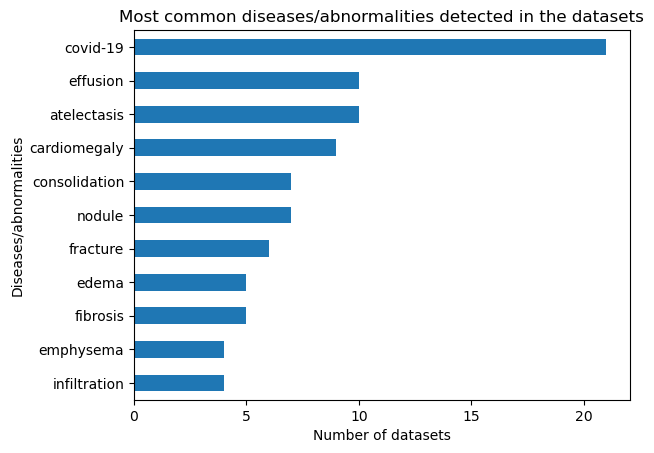

In [1612]:
#plot the most common diseases/abnormalities and the number of datasets:
ax = diseases_df.plot.barh(x='index',y='Number of datasets', legend=False, title="Most common diseases/abnormalities detected in the datasets")
ax.set_xlabel("Number of datasets")
ax.set_ylabel("Diseases/abnormalities")
ax.locator_params('x',integer=True)

# Metadata patients:

In [1639]:
df["Patient age"]

1                                       63.11 (± 16.75)
2                                              Reported
3                          60.1 (± 20.1), over 16 years
4                                                    NR
5                                                    NR
6                                                    NR
7                                                    NR
8                               46.63  (± 16.6), 0-95yo
9                                                    NR
10                                                   NR
11                                                   NR
12                                                   NR
13                                                   NR
14                                                   NR
15                                                   NR
16                                                   NR
17                                            mean 55.1
18                                   currently r

In [1641]:
df['Patient gender']

1                                   602 (45.92%) female
2                                              Reported
3     10278 male (52.4%), 8929 female (46.4%), 30 NA...
4                                                    NR
5                                                    NR
6                                                    NR
7                                                    NR
8              48780 female (43.5%), 63340 male (56.5%)
9                                                    NR
10                                                   NR
11                                                   NR
12                                                   NR
13                                                   NR
14                                                   NR
15                                                   NR
16                                                   NR
17                                 M/F ratio is 230/139
18                 63 female (25.9%), 180 male (

In [1663]:
n = df['Patient age'].count()

In [1664]:
##add rows with patient age reported or not (missing) in a column:
s='NR'
df['Patient age missing'] = df['Patient age'].apply(lambda x: any(s in x for i in df))

In [1665]:
#If patient age are not reported  (TRUE), if it is reported (FALSE)
age_NR_df = df.groupby(['Patient age missing'])[['Name']].count().reset_index()

In [1674]:
age_NR_df 

,Patient age missing,Name
0,False,15
1,True,28


In [1675]:
#add percentage to the group by:
age_NR_df ['percent']=age_NR_df['Name']/n*100

In [1676]:
age_NR_df 

,Patient age missing,Name,percent
0,False,15,34.883721
1,True,28,65.116279


In [1669]:
n = df['Patient gender'].count()

In [1670]:
n

43

In [1671]:
##add rows with patient gender reported or not (missing) in a column:
s='NR'
df['Patient gender missing'] = df['Patient gender'].apply(lambda x: any(s in x for i in df))

In [1672]:
#If patient gender are not reported  (TRUE), if it is reported (FALSE)
gender_NR_df = df.groupby(['Patient gender missing'])[['Name']].count().reset_index()

In [1673]:
gender_NR_df

,Patient gender missing,Name
0,False,16
1,True,27


In [1677]:
#add percentage to the group by:
gender_NR_df['percent']=gender_NR_df['Name']/n*100

In [1678]:
gender_NR_df

,Patient gender missing,Name,percent
0,False,16,37.209302
1,True,27,62.790698


# Quality of datasets

In [ ]:
#name, country of origin, publication year, number of images, number of patients, 